# Identifying Air Quality Zones in India: A Clustering Approach

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv")

In [3]:
df.head(15)

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",19-06-2025 14:00:00,16.486692,80.699436,NH3,NaN,NaN,NaN
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",19-06-2025 14:00:00,16.509717,80.612222,PM10,42.0,54.0,48.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",19-06-2025 14:00:00,16.509717,80.612222,NH3,4.0,7.0,5.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-06-2025 14:00:00,16.554731,80.649110,NO2,NaN,NaN,NaN
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",19-06-2025 14:00:00,17.720000,83.300000,SO2,7.0,94.0,24.0
5,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-06-2025 14:00:00,27.103358,93.679645,SO2,NaN,NaN,NaN
6,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-06-2025 14:00:00,27.103358,93.679645,OZONE,3.0,4.0,4.0
7,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",19-06-2025 14:00:00,25.427420,86.138861,NO2,28.0,82.0,64.0
8,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",19-06-2025 14:00:00,25.427420,86.138861,SO2,8.0,21.0,17.0
9,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",19-06-2025 14:00:00,26.803650,84.519540,NH3,2.0,4.0,3.0


In [4]:
df.dtypes

country           object
state             object
city              object
station           object
last_update       object
latitude         float64
longitude        float64
pollutant_id      object
pollutant_min    float64
pollutant_max    float64
pollutant_avg    float64
dtype: object

In [5]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    273
pollutant_max    273
pollutant_avg    273
dtype: int64

In [6]:
df.shape

(3206, 11)

In [7]:
df.duplicated().sum()

0

In [8]:
df['pollutant_id'].value_counts()

PM2.5    476
PM10     474
NO2      465
CO       462
SO2      456
OZONE    453
NH3      420
Name: pollutant_id, dtype: int64

In [9]:
df['country'].value_counts()

India    3206
Name: country, dtype: int64

In [10]:
df['state'].value_counts()

Maharashtra            569
Uttar_Pradesh          364
Rajasthan              322
Delhi                  250
TamilNadu              223
Bihar                  221
Karnataka              207
Madhya Pradesh         164
West_Bengal            140
Odisha                 120
Gujarat                106
Telangana               89
Chhattisgarh            87
Andhra_Pradesh          84
Assam                   59
Punjab                  45
Kerala                  40
Chandigarh              21
Uttarakhand             13
Haryana                 12
Tripura                  7
Puducherry               7
Sikkim                   7
Himachal Pradesh         7
Nagaland                 7
Mizoram                  6
Manipur                  6
Meghalaya                5
Arunachal_Pradesh        5
Jharkhand                5
Andaman and Nicobar      5
Jammu_and_Kashmir        3
Name: state, dtype: int64

In [11]:
df['city'].value_counts()

Delhi        250
Mumbai       192
Hyderabad     89
Bengaluru     82
Ahmedabad     58
            ... 
Ratlam         4
Damoh          4
Koppal         4
Srinagar       3
Nandesari      3
Name: city, Length: 249, dtype: int64

# Dropping the column last_update and country

In [12]:
df.drop(["last_update","country"], axis=1, inplace=True)

In [13]:
# Group by state and city, then aggregate pollutant_avg (assuming this is your target column)
grouped_df = df.groupby(["state", "city", "pollutant_id"])["pollutant_avg"].mean().reset_index()
for name, group in df.groupby(["state", "city", "pollutant_id"]):
    print(name)
    print(group)
    print()


# Now pivot to reshape the data
df_wg = grouped_df.pivot(
    index=["state", "city"],
    columns="pollutant_id",
    values="pollutant_avg"
).reset_index()

# Display the result




('Andaman and Nicobar', 'Sri Vijaya Puram', 'CO')
                    state              city  \
1955  Andaman and Nicobar  Sri Vijaya Puram   

                                    station   latitude  longitude  \
1955  Police Line, Sri Vijaya Puram - ANPCC  11.654054  92.734055   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1955           CO           15.0           25.0           20.0  

('Andaman and Nicobar', 'Sri Vijaya Puram', 'NO2')
                    state              city  \
1342  Andaman and Nicobar  Sri Vijaya Puram   

                                    station   latitude  longitude  \
1342  Police Line, Sri Vijaya Puram - ANPCC  11.654054  92.734055   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1342          NO2            8.0           97.0           42.0  

('Andaman and Nicobar', 'Sri Vijaya Puram', 'OZONE')
                  state              city  \
20  Andaman and Nicobar  Sri Vijaya Puram   

                         

('Andhra_Pradesh', 'Tirumala', 'SO2')
               state      city                      station  latitude  \
2622  Andhra_Pradesh  Tirumala  Toll Gate, Tirumala - APPCB     13.67   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2622      79.35          SO2            1.0            5.0            3.0  

('Andhra_Pradesh', 'Tirupati', 'CO')
               state      city                          station   latitude  \
1328  Andhra_Pradesh  Tirupati  Vaikuntapuram, Tirupati - APPCB  13.615387   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1328   79.40923           CO            5.0           16.0           14.0  

('Andhra_Pradesh', 'Tirupati', 'NH3')
               state      city                          station   latitude  \
1327  Andhra_Pradesh  Tirupati  Vaikuntapuram, Tirupati - APPCB  13.615387   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1327   79.40923          NH3            7.0 

5  93.679645          SO2            NaN            NaN            NaN  

('Assam', 'Byrnihat', 'CO')
    state      city                                   station   latitude  \
46  Assam  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  26.071318   

    longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
46   91.87488           CO           18.0           64.0           49.0  

('Assam', 'Byrnihat', 'NH3')
      state      city                                   station   latitude  \
2608  Assam  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  26.071318   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2608   91.87488          NH3            4.0            4.0            4.0  

('Assam', 'Byrnihat', 'NO2')
      state      city                                   station   latitude  \
1952  Assam  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  26.071318   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_a


('Assam', 'Sivasagar', 'NO2')
      state       city                          station   latitude  longitude  \
2629  Assam  Sivasagar  Girls College, Sivasagar - PCBA  26.987634  94.636574   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2629          NO2           10.0           19.0           15.0  

('Assam', 'Sivasagar', 'OZONE')
      state       city                          station   latitude  longitude  \
1979  Assam  Sivasagar  Girls College, Sivasagar - PCBA  26.987634  94.636574   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1979        OZONE            2.0            5.0            3.0  

('Assam', 'Sivasagar', 'PM10')
     state       city                          station   latitude  longitude  \
710  Assam  Sivasagar  Girls College, Sivasagar - PCBA  26.987634  94.636574   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
710         PM10           11.0           30.0           26.0  

('Assam', 'Sivasagar', 'PM2.

      state     city                         station   latitude  longitude  \
2595  Bihar  Chhapra  Darshan Nagar, Chhapra - BSPCB  25.780826  84.744677   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2595           CO            5.0            9.0            8.0  

('Bihar', 'Chhapra', 'NH3')
     state     city                         station   latitude  longitude  \
678  Bihar  Chhapra  Darshan Nagar, Chhapra - BSPCB  25.780826  84.744677   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
678          NH3            NaN            NaN            NaN  

('Bihar', 'Chhapra', 'NO2')
      state     city                         station   latitude  longitude  \
1355  Bihar  Chhapra  Darshan Nagar, Chhapra - BSPCB  25.780826  84.744677   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1355          NO2            NaN            NaN            NaN  

('Bihar', 'Chhapra', 'OZONE')
     state     city                         station   

('Bihar', 'Motihari', 'NH3')
      state      city                          station  latitude  longitude  \
2669  Bihar  Motihari  Gandak Colony, Motihari - BSPCB  26.63086   84.90051   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2669          NH3            3.0            3.0            3.0  

('Bihar', 'Motihari', 'NO2')
     state      city                          station  latitude  longitude  \
763  Bihar  Motihari  Gandak Colony, Motihari - BSPCB  26.63086   84.90051   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
763          NO2            7.0           11.0            8.0  

('Bihar', 'Motihari', 'OZONE')
      state      city                          station  latitude  longitude  \
1981  Bihar  Motihari  Gandak Colony, Motihari - BSPCB  26.63086   84.90051   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1981        OZONE            1.0           15.0            4.0  

('Bihar', 'Motihari', 'PM10')
      state    

78          NO2            6.0           10.0            7.0  

('Bihar', 'Saharsa', 'OZONE')
     state     city                       station   latitude  longitude  \
724  Bihar  Saharsa  Police Line, Saharsa - BSPCB  25.892357  86.590325   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
724        OZONE            8.0           33.0           15.0  

('Bihar', 'Saharsa', 'PM10')
     state     city                       station   latitude  longitude  \
721  Bihar  Saharsa  Police Line, Saharsa - BSPCB  25.892357  86.590325   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
721         PM10           10.0           46.0           26.0  

('Bihar', 'Saharsa', 'PM2.5')
      state     city                       station   latitude  longitude  \
1407  Bihar  Saharsa  Police Line, Saharsa - BSPCB  25.892357  86.590325   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1407        PM2.5            NaN            NaN            NaN  

('B

('Chhattisgarh', 'Bilaspur', 'PM10')
             state      city                   station  latitude  longitude  \
2656  Chhattisgarh  Bilaspur  Mangala, Bilaspur - NTPC  22.08815   82.13737   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2656         PM10           21.0           44.0           32.0  

('Chhattisgarh', 'Bilaspur', 'PM2.5')
             state      city                   station  latitude  longitude  \
1384  Chhattisgarh  Bilaspur  Mangala, Bilaspur - NTPC  22.08815   82.13737   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1384        PM2.5           17.0           45.0           32.0  

('Chhattisgarh', 'Bilaspur', 'SO2')
           state      city                   station  latitude  longitude  \
68  Chhattisgarh  Bilaspur  Mangala, Bilaspur - NTPC  22.08815   82.13737   

   pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
68          SO2           14.0           30.0           21.0  

('Chhattisgarh', 'Chhal', '

1386            7.0  

('Chhattisgarh', 'Tumidih', 'PM10')
           state     city                                    station  \
74  Chhattisgarh  Tumidih  OP Jindal Industrial Park, Tumidih - CECB   

     latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
74  22.066315  83.338201         PM10           17.0          123.0   

    pollutant_avg  
74           74.0  

('Chhattisgarh', 'Tumidih', 'PM2.5')
            state     city                                    station  \
769  Chhattisgarh  Tumidih  OP Jindal Industrial Park, Tumidih - CECB   

      latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
769  22.066315  83.338201        PM2.5           26.0           79.0   

     pollutant_avg  
769           56.0  

('Chhattisgarh', 'Tumidih', 'SO2')
             state     city                                    station  \
2683  Chhattisgarh  Tumidih  OP Jindal Industrial Park, Tumidih - CECB   

       latitude  longitude pollutant_id  pollutant_min  

        state       city                                            station  \
859   Gujarat  Ahmedabad              SVPI Airport Hansol, Ahmedabad - IITM   
1446  Gujarat  Ahmedabad                          Raikhad, Ahmedabad - IITM   
1455  Gujarat  Ahmedabad                   SAC ISRO Bopal, Ahmedabad - IITM   
2098  Gujarat  Ahmedabad                       Chandkheda, Ahmedabad - IITM   
2099  Gujarat  Ahmedabad                          Gyaspur, Ahmedabad - IITM   
2113  Gujarat  Ahmedabad                          Rakhial, Ahmedabad - IITM   
2743  Gujarat  Ahmedabad                        Maninagar, Ahmedabad - GPCB   
2750  Gujarat  Ahmedabad               SAC ISRO Satellite, Ahmedabad - IITM   
2778  Gujarat  Ahmedabad  Sardar Vallabhbhai Patel Stadium, Ahmedabad - ...   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
859   23.076793  72.627874        OZONE            5.0           33.0   
1446  23.020509  72.579261        OZONE            5.0         

192           CO           30.0           49.0           39.0  

('Gujarat', 'Surat', 'NO2')
        state   city                      station   latitude  longitude  \
2084  Gujarat  Surat  Science Center, Surat - SMC  21.170046  72.795405   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2084          NO2           11.0           16.0           14.0  

('Gujarat', 'Surat', 'PM10')
        state   city                      station   latitude  longitude  \
1485  Gujarat  Surat  Science Center, Surat - SMC  21.170046  72.795405   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1485         PM10           14.0          500.0          232.0  

('Gujarat', 'Surat', 'PM2.5')
        state   city                      station   latitude  longitude  \
1484  Gujarat  Surat  Science Center, Surat - SMC  21.170046  72.795405   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1484        PM2.5            7.0           65.0           22.0  

('

1512          SO2            7.0            7.0            7.0  

('Karnataka', 'Belgaum', 'CO')
         state     city                           station   latitude  \
832  Karnataka  Belgaum  Ramteerth Nagar, Belgaum - KSPCB  15.888653   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
832  74.541751           CO           12.0           22.0           19.0  

('Karnataka', 'Belgaum', 'NH3')
         state     city                           station   latitude  \
831  Karnataka  Belgaum  Ramteerth Nagar, Belgaum - KSPCB  15.888653   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
831  74.541751          NH3            3.0            5.0            3.0  

('Karnataka', 'Belgaum', 'NO2')
          state     city                           station   latitude  \
2091  Karnataka  Belgaum  Ramteerth Nagar, Belgaum - KSPCB  15.888653   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2091  74.541751         

233   76.55521         PM10           34.0           59.0           42.0  

('Karnataka', 'Chamarajanagar', 'PM2.5')
          state            city                        station  latitude  \
1497  Karnataka  Chamarajanagar  Urban, Chamarajanagar - KSPCB  11.55358   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1497   76.55521        PM2.5           19.0           46.0           28.0  

('Karnataka', 'Chamarajanagar', 'SO2')
          state            city                        station  latitude  \
2131  Karnataka  Chamarajanagar  Urban, Chamarajanagar - KSPCB  11.55358   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2131   76.55521          SO2            2.0            8.0            4.0  

('Karnataka', 'Chikkaballapur', 'CO')
          state            city                                       station  \
2135  Karnataka  Chikkaballapur  Chikkaballapur Rural, Chikkaballapur - KSPCB   

       latitude  longitude poll

('Karnataka', 'Davanagere', 'SO2')
         state        city                                   station  \
239  Karnataka  Davanagere  Devaraj Urs Badavane, Davanagere - KSPCB   

     latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
239   14.4758    75.9052          SO2            5.0            7.0   

     pollutant_avg  
239            6.0  

('Karnataka', 'Hubballi', 'CO')
         state      city                           station   latitude  \
902  Karnataka  Hubballi  Lingaraj Nagar, Hubballi - KSPCB  15.371482   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
902  75.116017           CO            9.0           16.0           13.0  

('Karnataka', 'Hubballi', 'NH3')
         state      city                           station   latitude  \
900  Karnataka  Hubballi  Lingaraj Nagar, Hubballi - KSPCB  15.371482   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
900  75.116017          NH3            1.0       

214        PM2.5           18.0           31.0           25.0  

('Karnataka', 'Mangalore', 'SO2')
         state       city                   station  latitude  longitude  \
216  Karnataka  Mangalore  Kadri, Mangalore - KSPCB  12.88925     74.853   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
216          SO2            6.0            7.0            7.0  

('Karnataka', 'Mysuru', 'CO')
          state    city                           station  latitude  \
1489  Karnataka  Mysuru  Hebbal 1st Stage, Mysuru - KSPCB  12.21041   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1489   76.37376           CO            2.0           21.0           14.0  

('Karnataka', 'Mysuru', 'NH3')
          state    city                           station  latitude  \
1488  Karnataka  Mysuru  Hebbal 1st Stage, Mysuru - KSPCB  12.21041   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1488   76.37376          NH3            3.0


('Karnataka', 'Tumakuru', 'OZONE')
          state      city                         station   latitude  \
1527  Karnataka  Tumakuru  Thimmalapura, Tumakuru - KSPCB  13.377516   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1527  77.099072        OZONE           15.0           15.0           15.0  

('Karnataka', 'Tumakuru', 'PM10')
          state      city                         station   latitude  \
2809  Karnataka  Tumakuru  Thimmalapura, Tumakuru - KSPCB  13.377516   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2809  77.099072         PM10           27.0          135.0           54.0  

('Karnataka', 'Tumakuru', 'PM2.5')
          state      city                         station   latitude  \
2808  Karnataka  Tumakuru  Thimmalapura, Tumakuru - KSPCB  13.377516   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2808  77.099072        PM2.5           13.0          133.0           36.0  

(

225           33.0  

('Kerala', 'Thiruvananthapuram', 'SO2')
       state                city  \
224   Kerala  Thiruvananthapuram   
1516  Kerala  Thiruvananthapuram   

                                           station  latitude  longitude  \
224   Kariavattom, Thiruvananthapuram - Kerala PCB  8.563700  76.886500   
1516    Plammoodu, Thiruvananthapuram - Kerala PCB  8.514909  76.943588   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
224           SO2            NaN            NaN            NaN  
1516          SO2            4.0           37.0           18.0  

('Kerala', 'Thrissur', 'CO')
      state      city                                    station  latitude  \
884  Kerala  Thrissur  Corporation Ground, Thrissur - Kerala PCB   10.5324   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
884    76.2159           CO           36.0           42.0           40.0  

('Kerala', 'Thrissur', 'NO2')
       state      city                  

240  76.064118        OZONE           14.0          121.0           84.0  

('Madhya Pradesh', 'Dewas', 'PM10')
              state   city                         station   latitude  \
932  Madhya Pradesh  Dewas  Bhopal Chauraha, Dewas - MPPCB  22.968259   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
932  76.064118         PM10           35.0           86.0           58.0  

('Madhya Pradesh', 'Dewas', 'PM2.5')
               state   city                         station   latitude  \
2826  Madhya Pradesh  Dewas  Bhopal Chauraha, Dewas - MPPCB  22.968259   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2826  76.064118        PM2.5           35.0           84.0           52.0  

('Madhya Pradesh', 'Dewas', 'SO2')
              state   city                         station   latitude  \
934  Madhya Pradesh  Dewas  Bhopal Chauraha, Dewas - MPPCB  22.968259   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_

2212           31.0  

('Madhya Pradesh', 'Jabalpur', 'PM10')
               state      city                                station  \
209   Madhya Pradesh  Jabalpur  Govindh Bhavan Colony, Jabalpur - JMC   
909   Madhya Pradesh  Jabalpur             Marhatal, Jabalpur - MPPCB   
2203  Madhya Pradesh  Jabalpur             Gupteshwar, Jabalpur - JMC   
2210  Madhya Pradesh  Jabalpur                 Suhagi, Jabalpur - JMC   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
209   23.163174  79.973061         PM10            6.0           76.0   
909   23.168606  79.932247         PM10           24.0           90.0   
2203  23.142888  79.916147         PM10           20.0          107.0   
2210  23.218135  79.957770         PM10           18.0          103.0   

      pollutant_avg  
209            39.0  
909            56.0  
2203           43.0  
2210           55.0  

('Madhya Pradesh', 'Jabalpur', 'PM2.5')
               state      city                         

287          NH3            2.0            3.0            2.0  

('Madhya Pradesh', 'Sagar', 'NO2')
               state   city                          station   latitude  \
2844  Madhya Pradesh  Sagar       Civil Lines, Sagar - MPPCB  23.838586   
2846  Madhya Pradesh  Sagar  Deen Dayal Nagar, Sagar - MPPCB  23.864016   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2844  78.759431          NO2            5.0            7.0            6.0  
2846  78.802893          NO2            NaN            NaN            NaN  

('Madhya Pradesh', 'Sagar', 'OZONE')
               state   city                     station   latitude  longitude  \
2845  Madhya Pradesh  Sagar  Civil Lines, Sagar - MPPCB  23.838586  78.759431   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2845        OZONE           18.0           50.0           28.0  

('Madhya Pradesh', 'Sagar', 'PM10')
               state   city                          station   latitude  \
289

('Maharashtra', 'Amravati', 'CO')
           state      city                                        station  \
304  Maharashtra  Amravati               Shivneri Colony, Amravati - MPCB   
947  Maharashtra  Amravati  Shri Shivaji Science College, Amravati - MPCB   

      latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
304  20.940236  77.789525           CO           10.0           20.0   
947  20.939198  77.765701           CO           10.0           31.0   

     pollutant_avg  
304           15.0  
947           16.0  

('Maharashtra', 'Amravati', 'NH3')
            state      city                                        station  \
2188  Maharashtra  Amravati               Shivneri Colony, Amravati - MPCB   
2191  Maharashtra  Amravati  Shri Shivaji Science College, Amravati - MPCB   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
2188  20.940236  77.789525          NH3            2.0            3.0   
2191  20.939198  77.765701          N

1586  79.298714           CO           48.0           50.0           50.0  

('Maharashtra', 'Chandrapur', 'NH3')
           state        city                            station  latitude  \
274  Maharashtra  Chandrapur  Chauhan Colony, Chandrapur - MPCB  19.96290   
298  Maharashtra  Chandrapur    MIDC Khutala, Chandrapur - MPCB  19.97753   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
274  79.298714          NH3            4.0            4.0            4.0  
298  79.233709          NH3            1.0            3.0            2.0  

('Maharashtra', 'Chandrapur', 'NO2')
            state        city                            station  latitude  \
273   Maharashtra  Chandrapur  Chauhan Colony, Chandrapur - MPCB  19.96290   
2218  Maharashtra  Chandrapur    MIDC Khutala, Chandrapur - MPCB  19.97753   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
273   79.298714          NO2           22.0           22.0           22.0  
2218

('Maharashtra', 'Mahad', 'PM10')
            state   city                            station  latitude  \
1578  Maharashtra  Mahad  Kamble Tarf Birwadi, Mahad - MPCB  18.10234   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1578  73.478369         PM10           23.0           41.0           29.0  

('Maharashtra', 'Mahad', 'PM2.5')
           state   city                            station  latitude  \
943  Maharashtra  Mahad  Kamble Tarf Birwadi, Mahad - MPCB  18.10234   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
943  73.478369        PM2.5            9.0           42.0           22.0  

('Maharashtra', 'Mahad', 'SO2')
            state   city                            station  latitude  \
2867  Maharashtra  Mahad  Kamble Tarf Birwadi, Mahad - MPCB  18.10234   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2867  73.478369          SO2            1.0           10.0            8.0  

('Mah

2917           24.0  

('Maharashtra', 'Mumbai', 'SO2')
            state    city                                            station  \
320   Maharashtra  Mumbai                               Worli, Mumbai - MPCB   
335   Maharashtra  Mumbai                         Mulund West, Mumbai - MPCB   
338   Maharashtra  Mumbai  Chhatrapati Shivaji Intl. Airport (T2), Mumbai...   
967   Maharashtra  Mumbai                Bandra Kurla Complex, Mumbai - IITM   
980   Maharashtra  Mumbai                       Borivali East, Mumbai - MPCB   
1006  Maharashtra  Mumbai                          Vasai West, Mumbai - MPCB   
1012  Maharashtra  Mumbai                Mindspace-Malad West, Mumbai - MPCB   
1020  Maharashtra  Mumbai             Khindipada-Bhandup West, Mumbai - IITM   
1558  Maharashtra  Mumbai                Chakala-Andheri East, Mumbai - IITM   
1561  Maharashtra  Mumbai                             Chembur, Mumbai - MPCB   
1581  Maharashtra  Mumbai                            Ghatkopar, 

            state         city                                  station  \
318   Maharashtra  Navi Mumbai                Nerul, Navi Mumbai - MPCB   
1030  Maharashtra  Navi Mumbai       Tondare-Taloja, Navi Mumbai - MPCB   
1648  Maharashtra  Navi Mumbai      Kopripada-Vashi, Navi Mumbai - MPCB   
2320  Maharashtra  Navi Mumbai               Mahape, Navi Mumbai - MPCB   
2936  Maharashtra  Navi Mumbai  Sector-2E Kalamboli, Navi Mumbai - MPCB   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
318   19.008751  73.016620          NH3            3.0            4.0   
1030  19.063000  73.120900          NH3            5.0            7.0   
1648  19.090337  73.014232          NH3            5.0            5.0   
2320  19.113505  73.008978          NH3            3.0            3.0   
2936  19.025790  73.102970          NH3            1.0            3.0   

      pollutant_avg  
318             4.0  
1030            6.0  
1648            5.0  
2320            3.0  


2977        OZONE           11.0           31.0           15.0  

('Maharashtra', 'Thane', 'PM10')
           state   city                      station   latitude  longitude  \
382  Maharashtra  Thane  Kasarvadavali, Thane - MPCB  19.267770  72.971820   
385  Maharashtra  Thane     Upvan Fort, Thane - MPCB  19.222279  72.957979   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
382         PM10           41.0           73.0           52.0  
385         PM10            6.0           25.0           13.0  

('Maharashtra', 'Thane', 'PM2.5')
            state   city                      station   latitude  longitude  \
381   Maharashtra  Thane  Kasarvadavali, Thane - MPCB  19.267770  72.971820   
1066  Maharashtra  Thane     Upvan Fort, Thane - MPCB  19.222279  72.957979   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
381         PM2.5           28.0           64.0           43.0  
1066        PM2.5            6.0           24.0           13.0  

('Mah

('Odisha', 'Barbil', 'CO')
       state    city                        station   latitude  longitude  \
2324  Odisha  Barbil  Forest Office, Barbil - OSPCB  22.116605  85.394555   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2324           CO           20.0           33.0           27.0  

('Odisha', 'Barbil', 'NH3')
       state    city                        station   latitude  longitude  \
1083  Odisha  Barbil  Forest Office, Barbil - OSPCB  22.116605  85.394555   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1083          NH3            1.0            6.0            2.0  

('Odisha', 'Barbil', 'NO2')
       state    city                        station   latitude  longitude  \
2322  Odisha  Barbil  Forest Office, Barbil - OSPCB  22.116605  85.394555   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2322          NO2            6.0           26.0           14.0  

('Odisha', 'Barbil', 'OZONE')
      state    city          

1680  85.474096         PM10           11.0           40.0           19.0  

('Odisha', 'Bileipada', 'PM2.5')
       state       city                           station   latitude  \
1072  Odisha  Bileipada  Tata Township, Bileipada - OSPCB  22.061567   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1072  85.474096        PM2.5            NaN            NaN            NaN  

('Odisha', 'Bileipada', 'SO2')
      state       city                           station   latitude  \
390  Odisha  Bileipada  Tata Township, Bileipada - OSPCB  22.061567   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
390  85.474096          SO2            7.0           12.0           10.0  

('Odisha', 'Brajrajnagar', 'CO')
      state          city                          station  latitude  \
391  Odisha  Brajrajnagar  GM Office, Brajrajnagar - OSPCB   21.8005   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
391  83.839698

2962  84.809444           CO           54.0          113.0           66.0  

('Odisha', 'Rourkela', 'NH3')
       state      city                          station   latitude  longitude  \
2355  Odisha  Rourkela  Raghunathpali, Rourkela - OSPCB  22.220833  84.809444   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2355          NH3            3.0            5.0            4.0  

('Odisha', 'Rourkela', 'NO2')
       state      city                                station   latitude  \
396   Odisha  Rourkela  Fertilizer Township, Rourkela - OSPCB  22.189722   
2354  Odisha  Rourkela        Raghunathpali, Rourkela - OSPCB  22.220833   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
396   84.862778          NO2           14.0           15.0           15.0  
2354  84.809444          NO2           17.0           34.0           25.0  

('Odisha', 'Rourkela', 'OZONE')
      state      city                          station   latitude  longitude  \

443          NO2           23.0           31.0           27.0  

('Punjab', 'Jalandhar', 'OZONE')
       state       city                       station   latitude  longitude  \
1110  Punjab  Jalandhar  Civil Line, Jalandhar - PPCB  31.321907  75.578914   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1110        OZONE           36.0          118.0           56.0  

('Punjab', 'Jalandhar', 'PM10')
       state       city                       station   latitude  longitude  \
1109  Punjab  Jalandhar  Civil Line, Jalandhar - PPCB  31.321907  75.578914   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1109         PM10           59.0           79.0           67.0  

('Punjab', 'Jalandhar', 'PM2.5')
       state       city                       station   latitude  longitude  \
3030  Punjab  Jalandhar  Civil Line, Jalandhar - PPCB  31.321907  75.578914   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
3030        PM2.5           44.0 

458           CO           10.0           21.0           14.0  

('Rajasthan', 'Banswara', 'NH3')
         state      city                       station  latitude  longitude  \
457  Rajasthan  Banswara  Rati Talai, Banswara - RSPCB  23.55519   74.44001   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
457          NH3            3.0           12.0            5.0  

('Rajasthan', 'Banswara', 'NO2')
         state      city                       station  latitude  longitude  \
456  Rajasthan  Banswara  Rati Talai, Banswara - RSPCB  23.55519   74.44001   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
456          NO2            4.0           18.0            8.0  

('Rajasthan', 'Banswara', 'OZONE')
         state      city                       station  latitude  longitude  \
459  Rajasthan  Banswara  Rati Talai, Banswara - RSPCB  23.55519   74.44001   

    pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
459        OZONE            5.0    

3023  76.862296        OZONE            9.0           43.0           23.0  

('Rajasthan', 'Bhiwadi', 'PM10')
          state     city                                station   latitude  \
455   Rajasthan  Bhiwadi   RIICO Ind. Area III, Bhiwadi - RSPCB  28.194909   
1733  Rajasthan  Bhiwadi  Vasundhara Nagar_UIT, Bhiwadi - RSPCB  28.207266   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
455   76.862296         PM10           32.0           86.0           62.0  
1733  76.829265         PM10           36.0          128.0           63.0  

('Rajasthan', 'Bhiwadi', 'PM2.5')
          state     city                                station   latitude  \
1097  Rajasthan  Bhiwadi   RIICO Ind. Area III, Bhiwadi - RSPCB  28.194909   
3024  Rajasthan  Bhiwadi  Vasundhara Nagar_UIT, Bhiwadi - RSPCB  28.207266   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1097  76.862296        PM2.5           26.0           94.0           54.0  
3024 


('Rajasthan', 'Hanumangarh', 'NH3')
         state         city                             station  latitude  \
437  Rajasthan  Hanumangarh  Housing Board, Hanumangarh - RSPCB  29.61075   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
437  74.283608          NH3            NaN            NaN            NaN  

('Rajasthan', 'Hanumangarh', 'NO2')
          state         city                             station  latitude  \
3011  Rajasthan  Hanumangarh  Housing Board, Hanumangarh - RSPCB  29.61075   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
3011  74.283608          NO2           10.0           39.0           18.0  

('Rajasthan', 'Hanumangarh', 'OZONE')
          state         city                             station  latitude  \
1127  Rajasthan  Hanumangarh  Housing Board, Hanumangarh - RSPCB  29.61075   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1127  74.283608        OZONE           1

('Rajasthan', 'Jhunjhunu', 'PM10')
          state       city                         station   latitude  \
3000  Rajasthan  Jhunjhunu  Indra Nagar, Jhunjhunu - RSPCB  28.108988   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
3000  75.386577         PM10           26.0           89.0           51.0  

('Rajasthan', 'Jhunjhunu', 'PM2.5')
         state       city                         station   latitude  \
501  Rajasthan  Jhunjhunu  Indra Nagar, Jhunjhunu - RSPCB  28.108988   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
501  75.386577        PM2.5            3.0           26.0           12.0  

('Rajasthan', 'Jhunjhunu', 'SO2')
          state       city                         station   latitude  \
2391  Rajasthan  Jhunjhunu  Indra Nagar, Jhunjhunu - RSPCB  28.108988   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2391  75.386577          SO2            1.0            2.0            1.0  


460  74.780702        OZONE           13.0           57.0           36.0  

('Rajasthan', 'Pratapgarh', 'PM10')
          state        city                            station   latitude  \
1708  Rajasthan  Pratapgarh  Pragati Nagar, Pratapgarh - RSPCB  24.041198   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1708  74.780702         PM10            6.0           65.0           29.0  

('Rajasthan', 'Pratapgarh', 'PM2.5')
         state        city                            station   latitude  \
499  Rajasthan  Pratapgarh  Pragati Nagar, Pratapgarh - RSPCB  24.041198   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
499  74.780702        PM2.5            2.0           47.0           19.0  

('Rajasthan', 'Pratapgarh', 'SO2')
          state        city                            station   latitude  \
1150  Rajasthan  Pratapgarh  Pragati Nagar, Pratapgarh - RSPCB  24.041198   

      longitude pollutant_id  pollutant_min  poll

2419  73.864511         PM10           54.0          500.0          117.0  

('Rajasthan', 'Sri Ganganagar', 'PM2.5')
          state            city                           station   latitude  \
2418  Rajasthan  Sri Ganganagar  Old City, Sri Ganganagar - RSPCB  29.931624   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2418  73.864511        PM2.5           37.0          442.0           73.0  

('Rajasthan', 'Sri Ganganagar', 'SO2')
         state            city                           station   latitude  \
469  Rajasthan  Sri Ganganagar  Old City, Sri Ganganagar - RSPCB  29.931624   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
469  73.864511          SO2            2.0           40.0           10.0  

('Rajasthan', 'Tonk', 'CO')
          state  city                      station   latitude  longitude  \
1172  Rajasthan  Tonk  Shastri Nagar, Tonk - RSPCB  26.159933  75.780517   

     pollutant_id  pollutant_min  poll

          state     city                              station   latitude  \
480   TamilNadu  Chennai           Perungudi, Chennai - TNPCB  12.953300   
1155  TamilNadu  Chennai  Velachery Res. Area, Chennai - CPCB  13.005219   
1184  TamilNadu  Chennai    Alandur Bus Depot, Chennai - CPCB  12.909916   
1186  TamilNadu  Chennai      Manali Village, Chennai - TNPCB  13.166200   
1792  TamilNadu  Chennai           Royapuram, Chennai - TNPCB  13.103600   
3045  TamilNadu  Chennai         Kodungaiyur, Chennai - TNPCB  13.127800   
3066  TamilNadu  Chennai               Manali, Chennai - CPCB  13.164544   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
480   80.235700        PM2.5           20.0           55.0           37.0  
1155  80.239812        PM2.5           61.0           80.0           71.0  
1184  80.107654        PM2.5           33.0           80.0           56.0  
1186  80.258400        PM2.5            6.0           53.0           18.0  
1792  80.29

580   79.30394        PM2.5           47.0           88.0           60.0  

('TamilNadu', 'Ranipet', 'SO2')
         state     city                            station   latitude  \
566  TamilNadu  Ranipet  VOC Nagar_SIPCOT, Ranipet - TNPCB  12.952707   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
566   79.30394          SO2           16.0           17.0           16.0  

('TamilNadu', 'Salem', 'CO')
          state   city                                    station   latitude  \
1190  TamilNadu  Salem  Sona College of Technology, Salem - TNPCB  11.679111   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1190  78.125052           CO           37.0           40.0           39.0  

('TamilNadu', 'Salem', 'NH3')
          state   city                                    station   latitude  \
1189  TamilNadu  Salem  Sona College of Technology, Salem - TNPCB  11.679111   

      longitude pollutant_id  pollutant_min  pollutant_max  

          state       city                                       station  \
528   Telangana  Hyderabad                Sanathnagar, Hyderabad - TSPCB   
530   Telangana  Hyderabad                 Somajiguda, Hyderabad - TSPCB   
1213  Telangana  Hyderabad   Bollaram Industrial Area, Hyderabad - TSPCB   
1217  Telangana  Hyderabad                   Zoo Park, Hyderabad - TSPCB   
1225  Telangana  Hyderabad        Nacharam_TSIIC IALA, Hyderabad - TSPCB   
1841  Telangana  Hyderabad                 IITH Kandi, Hyderabad - TSPCB   
1846  Telangana  Hyderabad  Kompally Municipal Office, Hyderabad - TSPCB   
1868  Telangana  Hyderabad         Central University, Hyderabad - TSPCB   
2474  Telangana  Hyderabad           IDA Pashamylaram, Hyderabad - TSPCB   
2487  Telangana  Hyderabad           Ramachandrapuram, Hyderabad - TSPCB   
3091  Telangana  Hyderabad                 ECIL Kapra, Hyderabad - TSPCB   
3092  Telangana  Hyderabad         ICRISAT Patancheru, Hyderabad - TSPCB   
3097  Telang

587  79.429637          SO2           65.0           68.0           66.0  

('Uttar_Pradesh', 'Bulandshahr', 'CO')
              state         city                           station   latitude  \
2462  Uttar_Pradesh  Bulandshahr  Yamunapuram, Bulandshahr - UPPCB  28.406963   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2462  77.849831           CO           26.0           48.0           31.0  

('Uttar_Pradesh', 'Bulandshahr', 'NH3')
              state         city                           station   latitude  \
2461  Uttar_Pradesh  Bulandshahr  Yamunapuram, Bulandshahr - UPPCB  28.406963   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
2461  77.849831          NH3            8.0           25.0           15.0  

('Uttar_Pradesh', 'Bulandshahr', 'NO2')
              state         city                           station   latitude  \
3106  Uttar_Pradesh  Bulandshahr  Yamunapuram, Bulandshahr - UPPCB  28.406963   

      long

              state    city                           station   latitude  \
1272  Uttar_Pradesh  Kanpur     NSI Kalyanpur, Kanpur - UPPCB  26.509954   
3139  Uttar_Pradesh  Kanpur  FTI Kidwai Nagar, Kanpur - UPPCB  26.428282   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1272  80.249612          NH3            2.0            2.0            2.0  
3139  80.327067          NH3            2.0            2.0            2.0  

('Uttar_Pradesh', 'Kanpur', 'NO2')
              state    city                           station   latitude  \
1270  Uttar_Pradesh  Kanpur  FTI Kidwai Nagar, Kanpur - UPPCB  26.428282   
1831  Uttar_Pradesh  Kanpur       Nehru Nagar, Kanpur - UPPCB  26.470314   
2548  Uttar_Pradesh  Kanpur     NSI Kalyanpur, Kanpur - UPPCB  26.509954   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1270  80.327067          NO2           17.0           17.0           17.0  
1831  80.322986          NO2           56.0       

1249  77.655757          SO2           25.0           49.0           31.0  

('Uttarakhand', 'Dehradun', 'CO')
           state      city                            station   latitude  \
646  Uttarakhand  Dehradun  Doon University, Dehradun - UKPCB  30.269444   

     longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
646  78.044167           CO            6.0           14.0            9.0  

('Uttarakhand', 'Dehradun', 'NO2')
            state      city                            station   latitude  \
3175  Uttarakhand  Dehradun  Doon University, Dehradun - UKPCB  30.269444   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
3175  78.044167          NO2            1.0            2.0            1.0  

('Uttarakhand', 'Dehradun', 'OZONE')
            state      city                            station   latitude  \
1884  Uttarakhand  Dehradun  Doon University, Dehradun - UKPCB  30.269444   

      longitude pollutant_id  pollutant_min  pollu

653  88.361759         PM10           16.0           66.0           49.0  

('West_Bengal', 'Barrackpore', 'PM2.5')
            state         city                            station   latitude  \
1277  West_Bengal  Barrackpore  SVSPA Campus, Barrackpore - WBPCB  22.760558   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1277  88.361759        PM2.5           21.0           50.0           33.0  

('West_Bengal', 'Barrackpore', 'SO2')
            state         city                            station   latitude  \
1870  West_Bengal  Barrackpore  SVSPA Campus, Barrackpore - WBPCB  22.760558   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
1870  88.361759          SO2            8.0            9.0            9.0  

('West_Bengal', 'Durgapur', 'CO')
            state      city  \
1873  West_Bengal  Durgapur   
2573  West_Bengal  Durgapur   
3186  West_Bengal  Durgapur   

                                                station   l

            state    city                           station   latitude  \
661   West_Bengal  Howrah        Belur Math, Howrah - WBPCB  22.629801   
662   West_Bengal  Howrah          Dasnagar, Howrah - WBPCB  22.602557   
664   West_Bengal  Howrah           Ghusuri, Howrah - WBPCB  22.611968   
1919  West_Bengal  Howrah  Botanical Garden, Howrah - WBPCB  22.554954   
1922  West_Bengal  Howrah        Padmapukur, Howrah - WBPCB  22.568732   

      longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
661   88.352017         PM10           22.0           61.0           32.0  
662   88.310566         PM10           23.0           42.0           30.0  
664   88.347422         PM10           17.0           61.0           37.0  
1919  88.292568         PM10           18.0           38.0           27.0  
1922  88.279728         PM10           30.0           44.0           37.0  

('West_Bengal', 'Howrah', 'PM2.5')
            state    city                           station   l

In [14]:
print(df_wg)

pollutant_id                state              city         CO        NH3  \
0             Andaman and Nicobar  Sri Vijaya Puram  20.000000        NaN   
1                  Andhra_Pradesh         Amaravati  43.000000   2.000000   
2                  Andhra_Pradesh         Anantapur  31.000000        NaN   
3                  Andhra_Pradesh          Chittoor  40.000000   7.000000   
4                  Andhra_Pradesh            Kadapa  16.000000   5.000000   
..                            ...               ...        ...        ...   
245                   West_Bengal          Durgapur  25.333333   2.666667   
246                   West_Bengal            Haldia  25.000000   5.000000   
247                   West_Bengal            Howrah  33.000000   7.200000   
248                   West_Bengal           Kolkata  24.600000   6.800000   
249                   West_Bengal          Siliguri  36.000000  10.000000   

pollutant_id        NO2      OZONE       PM10      PM2.5        SO2  
0    

In [14]:
df_wg.isnull().sum()

pollutant_id
state     0
city      0
CO       16
NH3      39
NO2      32
OZONE    18
PM10     33
PM2.5    37
SO2      26
dtype: int64

In [15]:
df_wg = pd.DataFrame(df_wg)

In [16]:
print(df_wg.head())

pollutant_id                state              city    CO  NH3   NO2  OZONE  \
0             Andaman and Nicobar  Sri Vijaya Puram  20.0  NaN  42.0   12.0   
1                  Andhra_Pradesh         Amaravati  43.0  2.0  36.0   17.0   
2                  Andhra_Pradesh         Anantapur  31.0  NaN   NaN   10.0   
3                  Andhra_Pradesh          Chittoor  40.0  7.0  20.0   34.0   
4                  Andhra_Pradesh            Kadapa  16.0  5.0  10.0   31.0   

pollutant_id  PM10  PM2.5   SO2  
0              NaN   13.0  12.0  
1             65.0   27.0  12.0  
2              NaN    NaN   NaN  
3             63.0   70.0  13.0  
4             55.0   62.0  15.0  


In [17]:
#STATE wise imputation in pollutant value
for state in df_wg["state"].unique():
    statewise_df = df_wg[df_wg["state"]==state].copy()
    statewise_df["CO"].replace(np.nan, statewise_df["CO"].mean(), inplace=True)
    df_wg.update(statewise_df)

In [18]:
columns_to_fill = ["CO", "NH3", "OZONE", "SO2", "NO2", "PM2.5", "PM10"]
for column in columns_to_fill:
    for state in df_wg["state"].unique():
        statewise_df = df_wg[df_wg["state"]==state].copy()
        statewise_df[column].replace(np.nan, statewise_df[column].mean(), inplace=True)
        df_wg.update(statewise_df)

In [19]:
df_wg.isnull().sum()

pollutant_id
state    0
city     0
CO       1
NH3      6
NO2      4
OZONE    2
PM10     6
PM2.5    6
SO2      4
dtype: int64

In [20]:
df_wg["CO"]

0      20.000000
1      43.000000
2      31.000000
3      40.000000
4      16.000000
         ...    
245    25.333333
246    25.000000
247    33.000000
248    24.600000
249    36.000000
Name: CO, Length: 250, dtype: float64

In [21]:
null_rows = df_wg[df_wg.isnull().any(axis=1)]
print(null_rows)


pollutant_id                state              city    CO  NH3   NO2  OZONE  \
0             Andaman and Nicobar  Sri Vijaya Puram  20.0  NaN  42.0   12.0   
10              Arunachal_Pradesh        Naharlagun   5.0  NaN   NaN    4.0   
60              Jammu_and_Kashmir          Srinagar  15.0  NaN   NaN    NaN   
61                      Jharkhand           Dhanbad   5.0  NaN  67.0   12.0   
130                       Manipur            Imphal   7.0  2.0   7.0    NaN   
131                     Meghalaya          Shillong   4.0  NaN   NaN    6.0   
132                       Mizoram            Aizawl   3.0  NaN   NaN    5.0   
192                        Sikkim           Gangtok   9.0  1.0   1.0   18.0   
220                       Tripura          Agartala   NaN  2.0   4.0   20.0   

pollutant_id  PM10  PM2.5    SO2  
0              NaN   13.0   12.0  
10             NaN    NaN    NaN  
60            77.0   64.0    NaN  
61             NaN    NaN    NaN  
130           12.0    NaN  109.0  

In [22]:
df_wg.dropna(inplace=True)

In [23]:
df_wg.isnull().sum()

pollutant_id
state    0
city     0
CO       0
NH3      0
NO2      0
OZONE    0
PM10     0
PM2.5    0
SO2      0
dtype: int64

In [24]:
df_wg.shape

(241, 9)

In [25]:
all_state = df["state"].unique().tolist()

In [26]:
null_state = null_rows["state"].unique().tolist()

In [27]:
states = [x for x in all_state if x not in null_state]


In [28]:
print(states)

['Andhra_Pradesh', 'Bihar', 'Assam', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Gujarat', 'Karnataka', 'Haryana', 'Madhya Pradesh', 'Kerala', 'Maharashtra', 'Nagaland', 'Odisha', 'Rajasthan', 'Punjab', 'Puducherry', 'TamilNadu', 'Telangana', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal', 'Himachal Pradesh']


In [29]:
# Group by state and city, then aggregate pollutant_avg (assuming this is your target column)
grouped_df = df.groupby(["state", "city", "pollutant_id"])["pollutant_min"].mean().reset_index()

# Now pivot to reshape the data
df_wg1 = grouped_df.pivot(
    index=["state", "city"],
    columns="pollutant_id",
    values="pollutant_min"
).reset_index()

# Display the result
print(df_wg1)

pollutant_id                state              city         CO  NH3   NO2  \
0             Andaman and Nicobar  Sri Vijaya Puram  15.000000  NaN   8.0   
1                  Andhra_Pradesh         Amaravati   2.000000  1.0  30.0   
2                  Andhra_Pradesh         Anantapur  28.000000  NaN   NaN   
3                  Andhra_Pradesh          Chittoor  27.000000  6.0  16.0   
4                  Andhra_Pradesh            Kadapa  13.000000  4.0  10.0   
..                            ...               ...        ...  ...   ...   
245                   West_Bengal          Durgapur  14.666667  1.0  12.0   
246                   West_Bengal            Haldia  21.000000  4.0  11.0   
247                   West_Bengal            Howrah  24.400000  5.0  14.0   
248                   West_Bengal           Kolkata  19.200000  6.0  29.8   
249                   West_Bengal          Siliguri  23.000000  9.0  16.0   

pollutant_id      OZONE  PM10      PM2.5        SO2  
0              3.0000

In [30]:
df_wg1.isnull().sum()

pollutant_id
state     0
city      0
CO       16
NH3      39
NO2      32
OZONE    18
PM10     33
PM2.5    37
SO2      26
dtype: int64

In [31]:
columns_to_fill = ["CO", "NH3", "OZONE", "SO2", "NO2", "PM2.5", "PM10"]
for column in columns_to_fill:
    for state in df_wg1["state"].unique():
        statewise_df1 = df_wg1[df_wg1["state"]==state].copy()
        statewise_df1[column].replace(np.nan, statewise_df1[column].mean(), inplace=True)
        df_wg1.update(statewise_df1)

In [32]:
df_wg1.isnull().sum()

pollutant_id
state    0
city     0
CO       1
NH3      6
NO2      4
OZONE    2
PM10     6
PM2.5    6
SO2      4
dtype: int64

In [33]:
df_wg1[df_wg1.isnull().any(axis=1)]

pollutant_id,state,city,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,Andaman and Nicobar,Sri Vijaya Puram,15.0,NaN,8.0,3.0,NaN,2.0,4.0
10,Arunachal_Pradesh,Naharlagun,2.0,NaN,NaN,3.0,NaN,NaN,NaN
60,Jammu_and_Kashmir,Srinagar,11.0,NaN,NaN,NaN,38.0,30.0,NaN
61,Jharkhand,Dhanbad,2.0,NaN,59.0,2.0,NaN,NaN,NaN
130,Manipur,Imphal,6.0,2.0,7.0,NaN,4.0,NaN,108.0
131,Meghalaya,Shillong,3.0,NaN,NaN,1.0,NaN,2.0,4.0
132,Mizoram,Aizawl,3.0,NaN,NaN,3.0,1.0,NaN,6.0
192,Sikkim,Gangtok,2.0,1.0,1.0,11.0,NaN,NaN,NaN
220,Tripura,Agartala,NaN,2.0,3.0,16.0,NaN,NaN,23.0


In [34]:
df_wg1.dropna(inplace=True)

In [35]:
df_wg1.isnull().sum()

pollutant_id
state    0
city     0
CO       0
NH3      0
NO2      0
OZONE    0
PM10     0
PM2.5    0
SO2      0
dtype: int64

In [36]:
# Group by state and city, then aggregate pollutant_avg (assuming this is your target column)
grouped_df = df.groupby(["state", "city", "pollutant_id"])["pollutant_max"].mean().reset_index()

# Now pivot to reshape the data
df_wg2 = grouped_df.pivot(
    index=["state", "city"],
    columns="pollutant_id",
    values="pollutant_max"
).reset_index()

# Display the result
print(df_wg2)

pollutant_id                state              city         CO   NH3   NO2  \
0             Andaman and Nicobar  Sri Vijaya Puram  25.000000   NaN  97.0   
1                  Andhra_Pradesh         Amaravati  66.000000   3.0  53.0   
2                  Andhra_Pradesh         Anantapur  40.000000   NaN   NaN   
3                  Andhra_Pradesh          Chittoor  48.000000   7.0  23.0   
4                  Andhra_Pradesh            Kadapa  18.000000   6.0  12.0   
..                            ...               ...        ...   ...   ...   
245                   West_Bengal          Durgapur  48.333333   8.0  47.0   
246                   West_Bengal            Haldia  30.000000   6.0  37.0   
247                   West_Bengal            Howrah  48.800000   8.8  42.4   
248                   West_Bengal           Kolkata  30.000000   8.8  64.4   
249                   West_Bengal          Siliguri  94.000000  11.0  27.0   

pollutant_id      OZONE   PM10  PM2.5        SO2  
0           

In [37]:
df_wg2.isnull().sum()

pollutant_id
state     0
city      0
CO       16
NH3      39
NO2      32
OZONE    18
PM10     33
PM2.5    37
SO2      26
dtype: int64

In [38]:
columns_to_fill = ["CO", "NH3", "OZONE", "SO2", "NO2", "PM2.5", "PM10"]
for column in columns_to_fill:
    for state in df_wg2["state"].unique():
        statewise_df2 = df_wg2[df_wg2["state"]==state].copy()
        statewise_df2[column].replace(np.nan, statewise_df2[column].mean(), inplace=True)
        df_wg2.update(statewise_df2)

In [39]:
df_wg2.isnull().sum()

pollutant_id
state    0
city     0
CO       1
NH3      6
NO2      4
OZONE    2
PM10     6
PM2.5    6
SO2      4
dtype: int64

In [40]:
df_wg2.dropna(inplace=True)

In [41]:
combined_df = pd.concat([df_wg, df_wg1, df_wg2], axis=1)

In [42]:
combined_df.head()

pollutant_id,state,city,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,state,...,SO2,state,city,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
1,Andhra_Pradesh,Amaravati,43.0,2.0000,36.0000,17.0,65.000000,27.0000,12.00,Andhra_Pradesh,...,10.0000,Andhra_Pradesh,Amaravati,66.0,3.0000,53.000,31.0,164.000000,45.0000,15.000
2,Andhra_Pradesh,Anantapur,31.0,4.0625,27.4375,10.0,67.285714,49.4375,12.25,Andhra_Pradesh,...,8.1875,Andhra_Pradesh,Anantapur,40.0,6.8125,39.875,12.0,117.285714,65.8125,24.625
3,Andhra_Pradesh,Chittoor,40.0,7.0000,20.0000,34.0,63.000000,70.0000,13.00,Andhra_Pradesh,...,12.0000,Andhra_Pradesh,Chittoor,48.0,7.0000,23.000,41.0,67.000000,73.0000,21.000
4,Andhra_Pradesh,Kadapa,16.0,5.0000,10.0000,31.0,55.000000,62.0000,15.00,Andhra_Pradesh,...,14.0000,Andhra_Pradesh,Kadapa,18.0,6.0000,12.000,34.0,59.000000,67.0000,17.000
5,Andhra_Pradesh,Rajamahendravaram,17.0,2.0000,12.0000,6.0,53.000000,32.0000,3.00,Andhra_Pradesh,...,1.0000,Andhra_Pradesh,Rajamahendravaram,27.0,17.0000,27.000,7.0,75.000000,42.0000,4.000


In [43]:
combined_df.columns

Index(['state', 'city', 'CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2',
       'state', 'city', 'CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2',
       'state', 'city', 'CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2'],
      dtype='object', name='pollutant_id')

In [44]:
combined_df = combined_df.T.drop_duplicates().T


In [45]:
combined_df.columns 


Index(['state', 'city', 'CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2',
       'CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2', 'CO', 'NH3', 'NO2',
       'OZONE', 'PM10', 'PM2.5', 'SO2'],
      dtype='object', name='pollutant_id')

In [46]:
combined_df_columns = ['state', 'city', 'avg_CO', 'avg_NH3', 'avg_NO2', 'avg_OZONE', 'avg_PM10', 'avg_PM2.5', 'avg_SO2',
       'min_CO', 'min_NH3', 'min_NO2', 'min_OZONE', 'min_PM10', 'min_PM2.5', 'min_SO2',
       'max_CO', 'max_NH3', 'max_NO2', 'max_OZONE', 'max_PM10', 'max_PM2.5', 'max_SO2']

In [47]:
combined_df.columns = combined_df_columns

In [48]:
combined_df.head()

,state,city,avg_CO,avg_NH3,avg_NO2,avg_OZONE,avg_PM10,avg_PM2.5,avg_SO2,min_CO,...,min_PM10,min_PM2.5,min_SO2,max_CO,max_NH3,max_NO2,max_OZONE,max_PM10,max_PM2.5,max_SO2
1,Andhra_Pradesh,Amaravati,43.0,2.0,36.0,17.0,65.0,27.0,12.0,2.0,...,33.0,15.0,10.0,66.0,3.0,53.0,31.0,164.0,45.0,15.0
2,Andhra_Pradesh,Anantapur,31.0,4.0625,27.4375,10.0,67.285714,49.4375,12.25,28.0,...,46.214286,37.375,8.1875,40.0,6.8125,39.875,12.0,117.285714,65.8125,24.625
3,Andhra_Pradesh,Chittoor,40.0,7.0,20.0,34.0,63.0,70.0,13.0,27.0,...,59.0,65.0,12.0,48.0,7.0,23.0,41.0,67.0,73.0,21.0
4,Andhra_Pradesh,Kadapa,16.0,5.0,10.0,31.0,55.0,62.0,15.0,13.0,...,47.0,54.0,14.0,18.0,6.0,12.0,34.0,59.0,67.0,17.0
5,Andhra_Pradesh,Rajamahendravaram,17.0,2.0,12.0,6.0,53.0,32.0,3.0,9.0,...,41.0,22.0,1.0,27.0,17.0,27.0,7.0,75.0,42.0,4.0


# EDA

<BarContainer object of 241 artists>

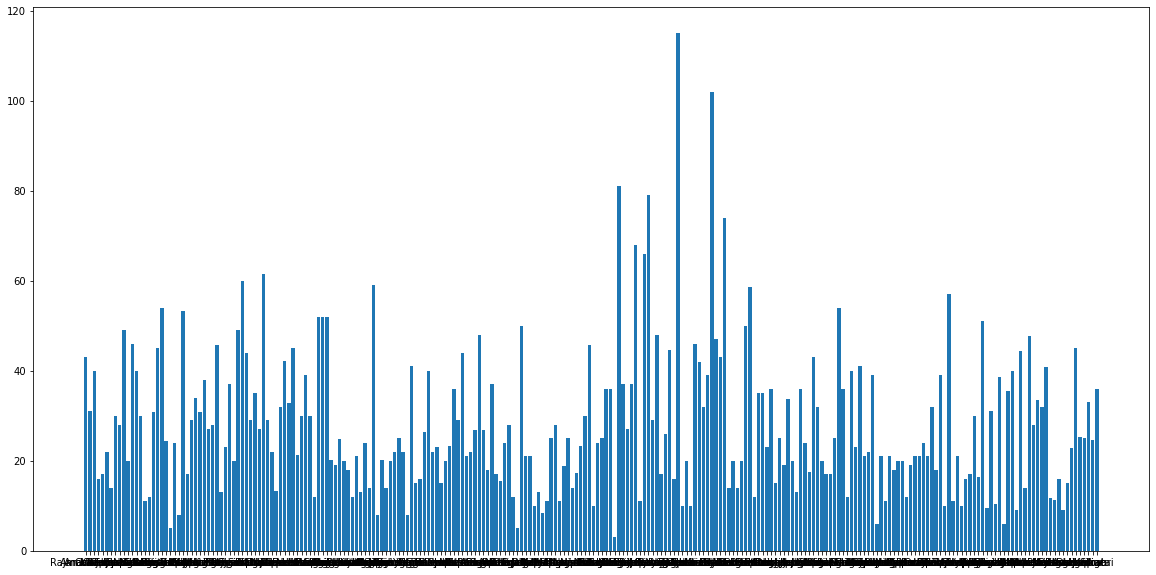

In [50]:
plt.figure(figsize=(20,10))#improve
plt.bar(x=df_wg["city"], height=df_wg["CO"])

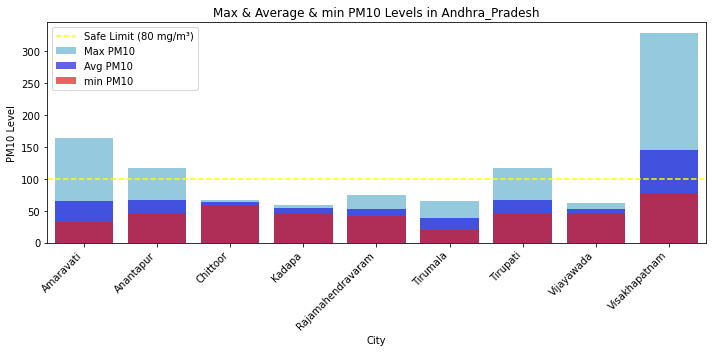

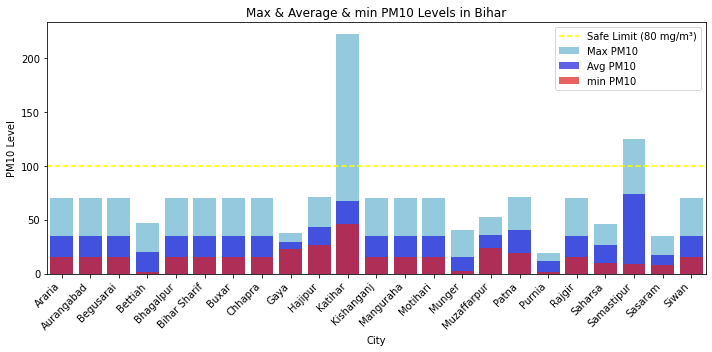

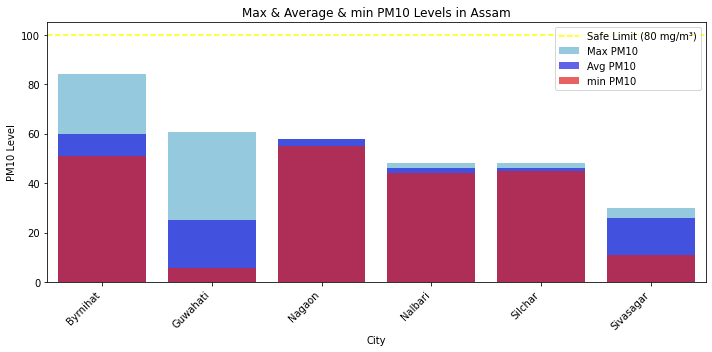

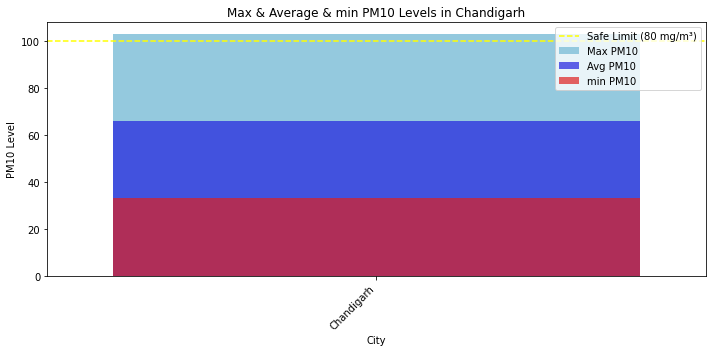

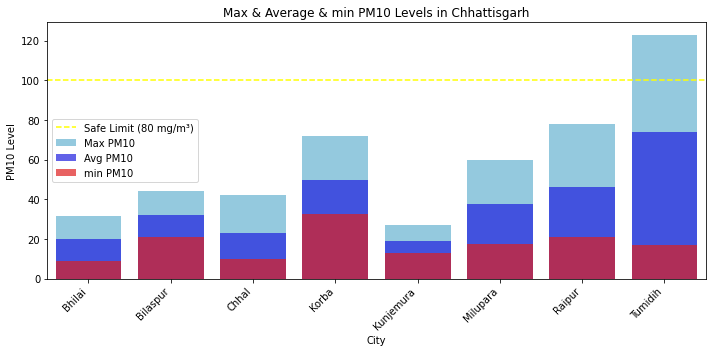

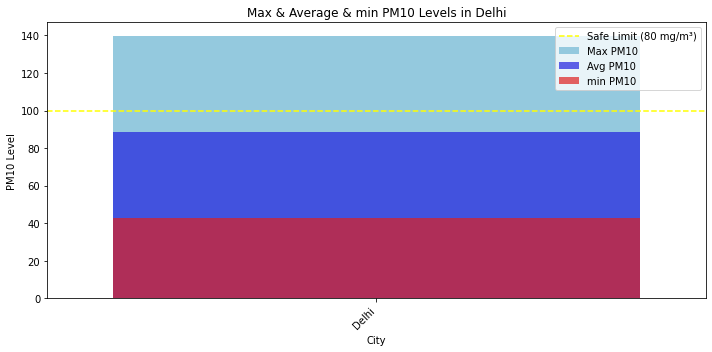

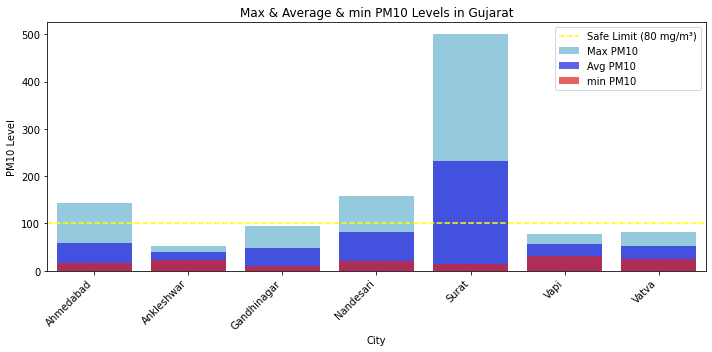

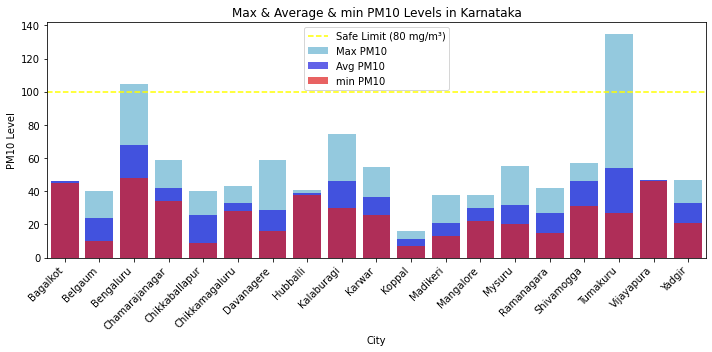

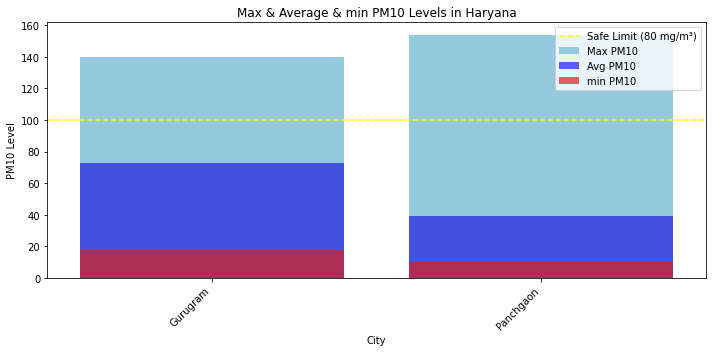

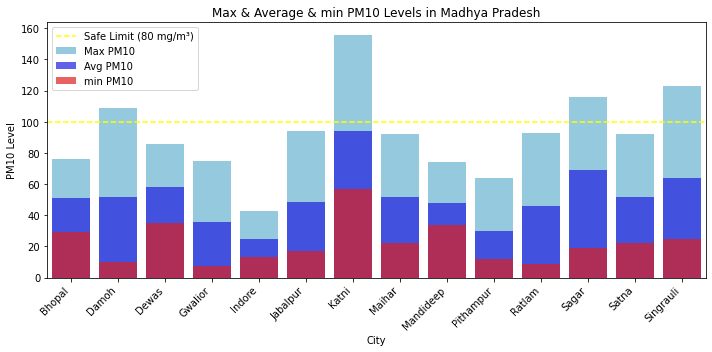

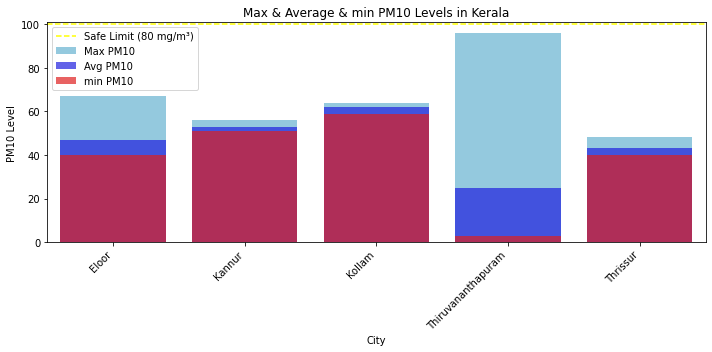

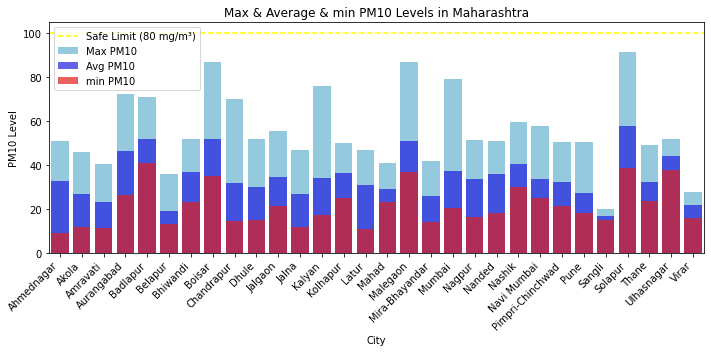

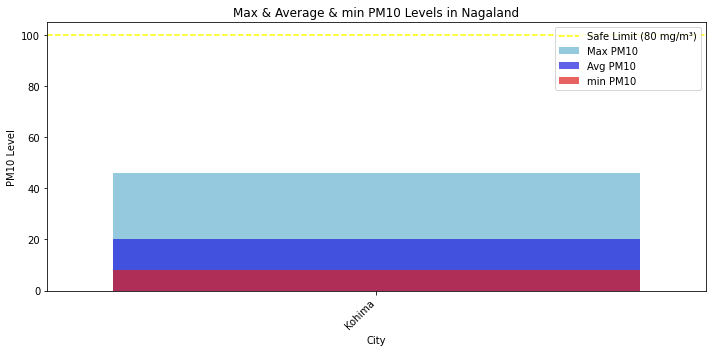

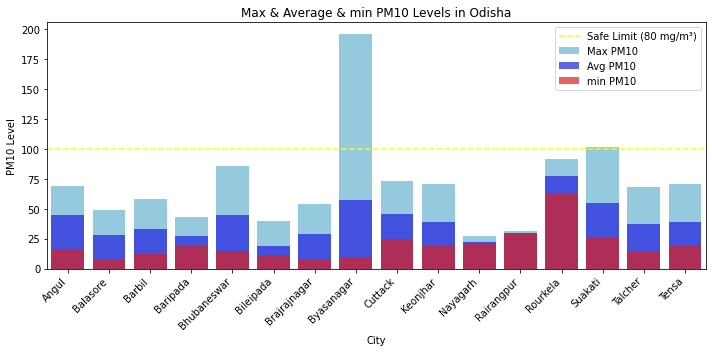

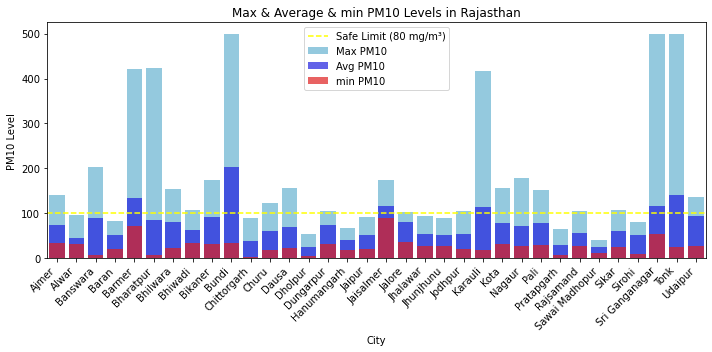

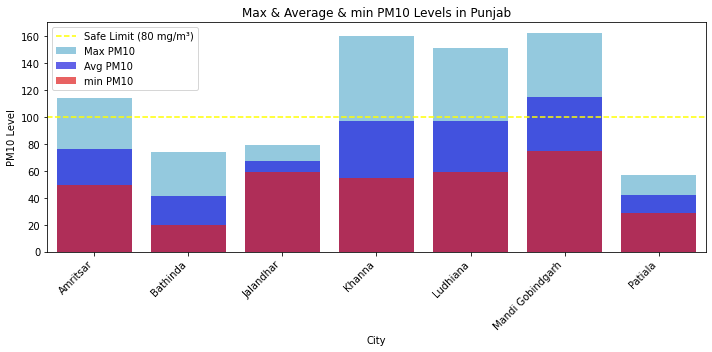

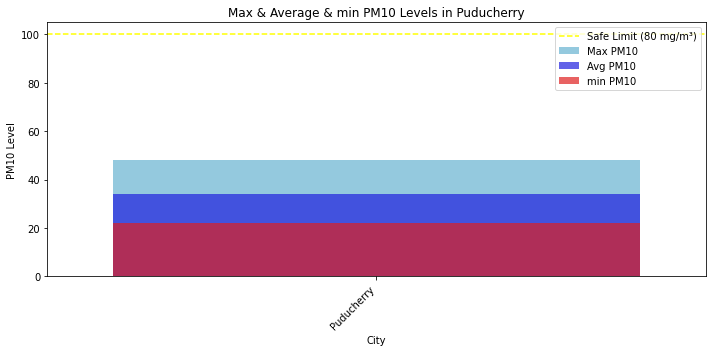

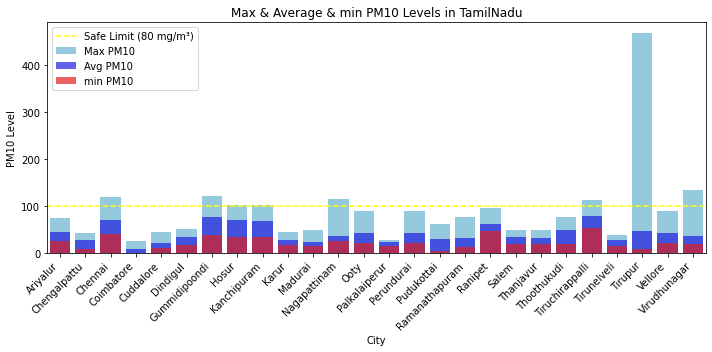

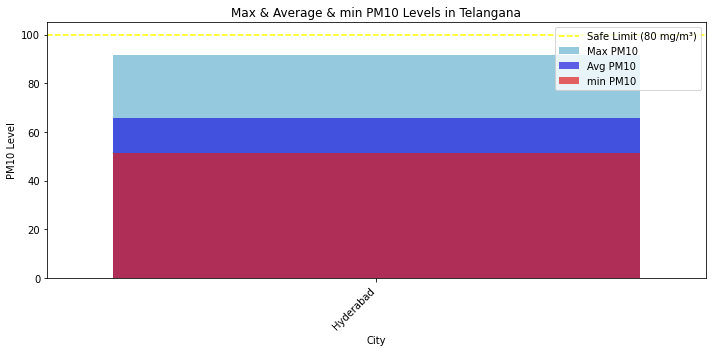

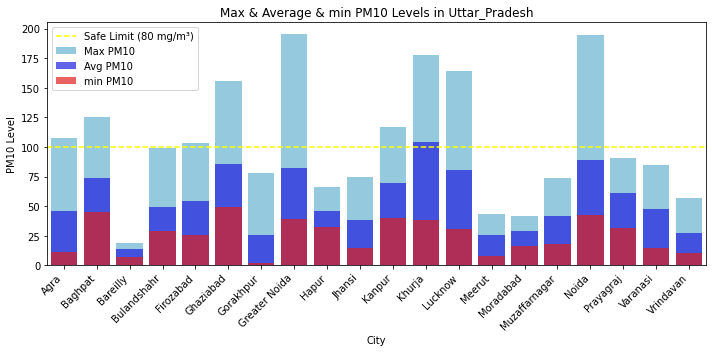

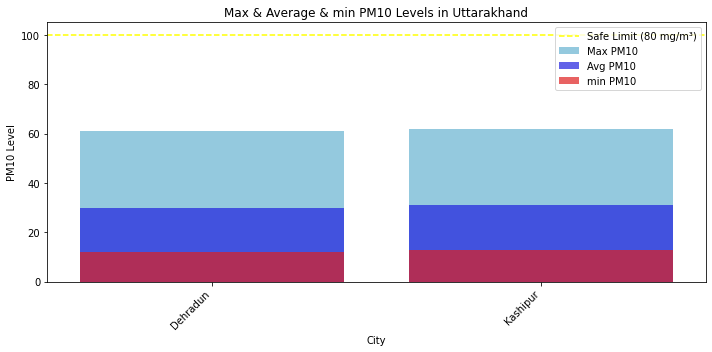

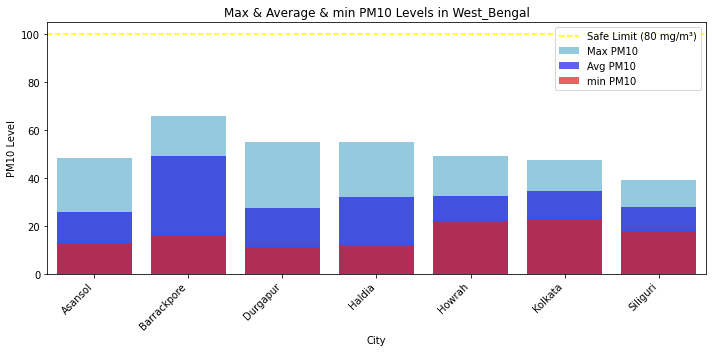

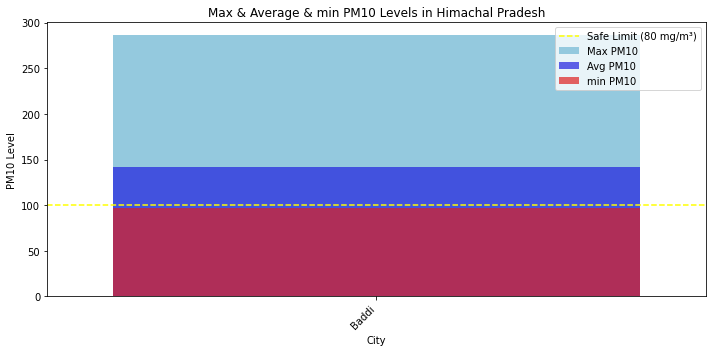

In [61]:
for state in states:
    state_df = combined_df[combined_df["state"] == state]
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=state_df, 
        x="city", 
        y="max_PM10", 
        color="skyblue", 
        label="Max PM10"
    )
    sns.barplot(
        data=state_df, 
        x="city", 
        y="avg_PM10", 
        color="blue", 
        label="Avg PM10",
        alpha=0.7 
    )
    sns.barplot(
        data=state_df, 
        x="city", 
        y="min_PM10", 
        color="red", 
        label="min PM10",
        alpha=0.7  
    )
    
    plt.axhline(y=100, color="yellow", linestyle="--", label="Safe Limit (80 mg/m³)")
    plt.xticks(rotation=45, ha="right")  # Rotate city names for readability
    plt.xlabel("City")
    plt.ylabel("PM10 Level")
    plt.title(f"Max & Average & min PM10 Levels in {state}")
    plt.legend() 
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

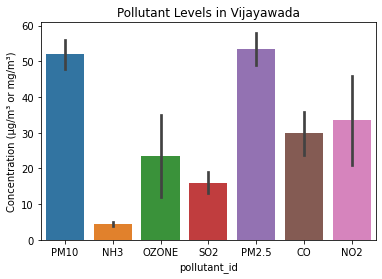

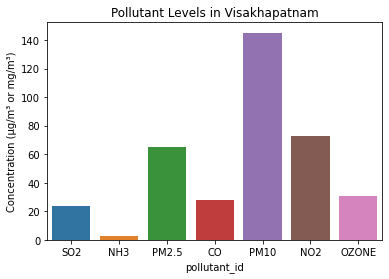

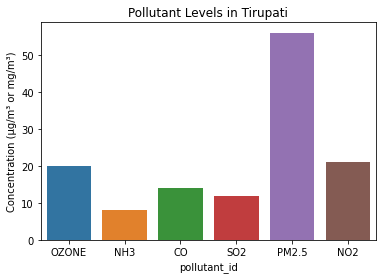

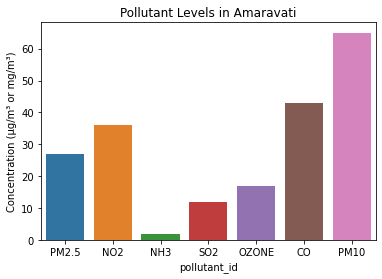

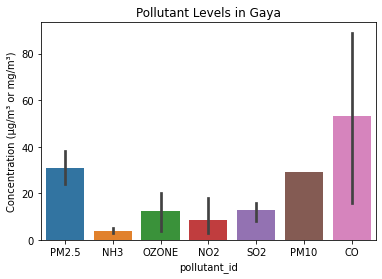

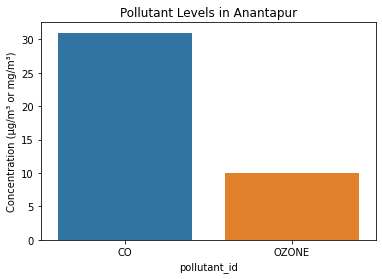

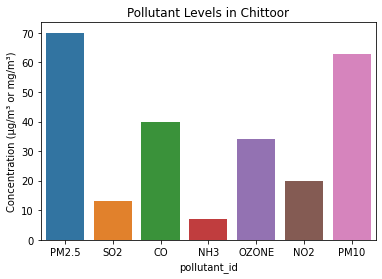

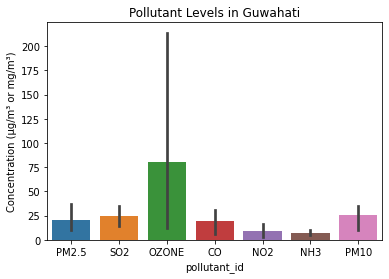

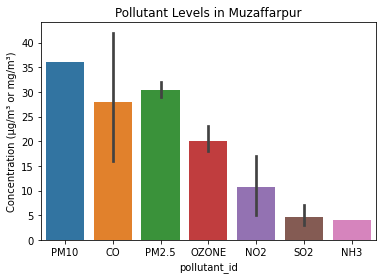

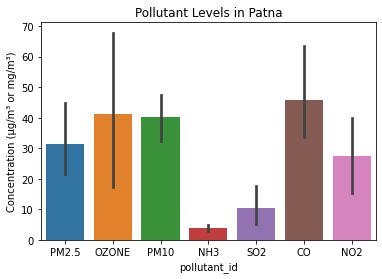

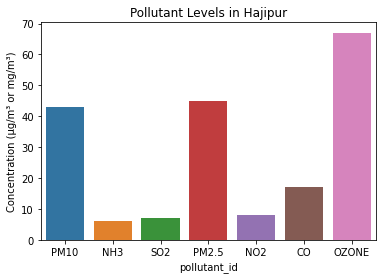

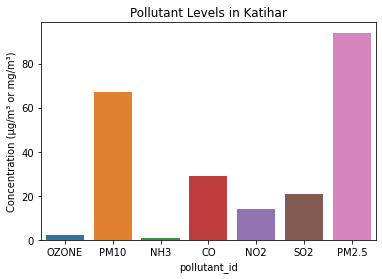

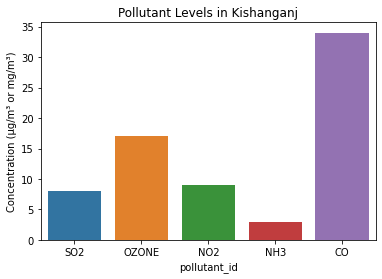

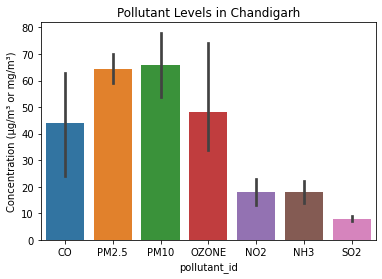

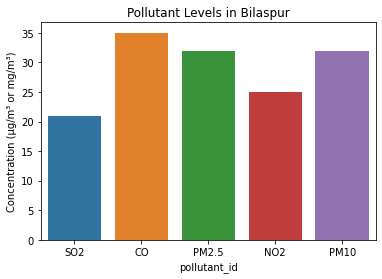

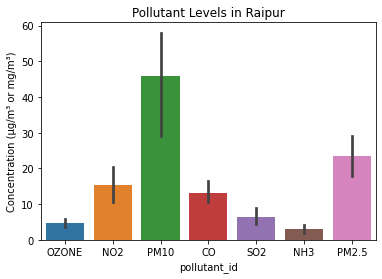

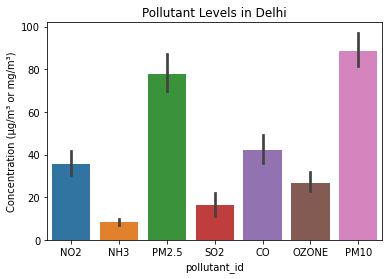

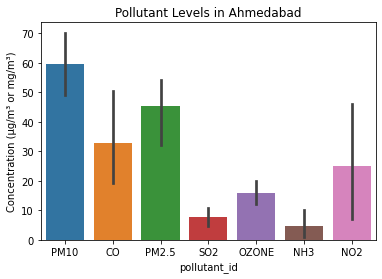

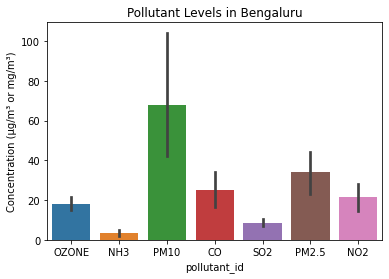

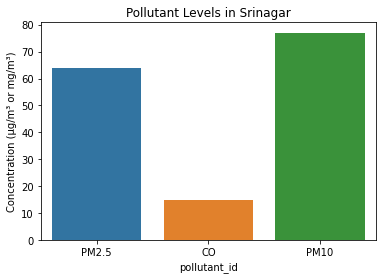

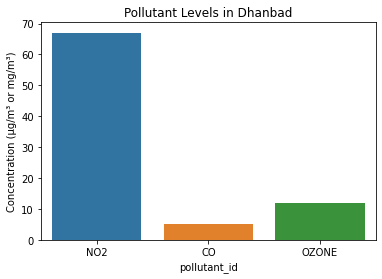

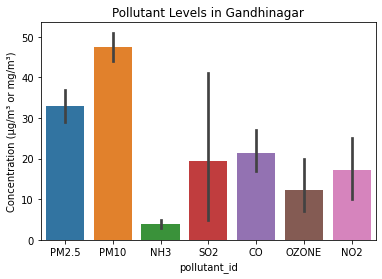

ValueError: min() arg is an empty sequence

In [53]:
# Compare CO with pollutants in a city######### 
for city in ['Vijayawada', 'Visakhapatnam','Tirupati','Amaravati','Gaya', 'Anantapur', 'Chittoor', 'Guwahati','Muzaffarpur', 'Patna', 'Hajipur',
'Katihar', 'Kishanganj', 'Chandigarh',  'Bilaspur','Raipur', 'Delhi', 'Ahmedabad','Bengaluru', 'Srinagar', 'Dhanbad',
'Gandhinagar', 'Nandesari', 'Surat', 'Pune', 'Virar', 'Imphal', 'Shillong', 'Aizawl', 'Kohima','Hyderabad', 'Agartala', 'Agra', 'Kanchipuram', 'Karur', 'Madurai', 'Thanjavur', 'Tiruchirappalli', 'Ooty', 'Bareilly', 'Lucknow', 'Meerut',
'Moradabad', 'Muzaffarnagar', 'Noida', 'Prayagraj']:
    city_df = df[df["city"] == city].dropna(subset=["pollutant_avg"])
    sns.barplot(data=city_df, x="pollutant_id", y="pollutant_avg")
    plt.title(f"Pollutant Levels in {city}")
    plt.ylabel("Concentration (µg/m³ or mg/m³)")
    plt.show()

In [57]:
combined_df.head()

,state,city,avg_CO,avg_NH3,avg_NO2,avg_OZONE,avg_PM10,avg_PM2.5,avg_SO2,min_CO,...,min_PM10,min_PM2.5,min_SO2,max_CO,max_NH3,max_NO2,max_OZONE,max_PM10,max_PM2.5,max_SO2
1,Andhra_Pradesh,Amaravati,43.0,2.0,36.0,17.0,65.0,27.0,12.0,2.0,...,33.0,15.0,10.0,66.0,3.0,53.0,31.0,164.0,45.0,15.0
2,Andhra_Pradesh,Anantapur,31.0,4.0625,27.4375,10.0,67.285714,49.4375,12.25,28.0,...,46.214286,37.375,8.1875,40.0,6.8125,39.875,12.0,117.285714,65.8125,24.625
3,Andhra_Pradesh,Chittoor,40.0,7.0,20.0,34.0,63.0,70.0,13.0,27.0,...,59.0,65.0,12.0,48.0,7.0,23.0,41.0,67.0,73.0,21.0
4,Andhra_Pradesh,Kadapa,16.0,5.0,10.0,31.0,55.0,62.0,15.0,13.0,...,47.0,54.0,14.0,18.0,6.0,12.0,34.0,59.0,67.0,17.0
5,Andhra_Pradesh,Rajamahendravaram,17.0,2.0,12.0,6.0,53.0,32.0,3.0,9.0,...,41.0,22.0,1.0,27.0,17.0,27.0,7.0,75.0,42.0,4.0


# Modelling 

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Select features for clustering
numerical_features = ['avg_CO', 'avg_NH3', 'avg_NO2', 'avg_OZONE', 'avg_PM10', 'avg_PM2.5', 'avg_SO2',
       'min_CO', 'min_NH3', 'min_NO2', 'min_OZONE', 'min_PM10', 'min_PM2.5', 'min_SO2',
       'max_CO', 'max_NH3', 'max_NO2', 'max_OZONE', 'max_PM10', 'max_PM2.5', 'max_SO2']
categorical_features = ['state', 'city']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
processed_data = preprocessor.fit_transform(combined_df)

K-means Silhouette Score: 0.211


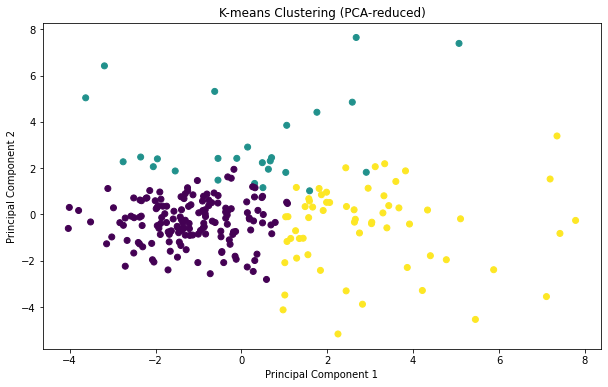

In [63]:
# Apply K-means with optimal k (let's assume k=4 based on elbow method)
kmeans = KMeans(n_clusters=3, init='random', random_state=42)
kmeans_labels = kmeans.fit_predict(processed_data)

# Add cluster labels to original data
combined_df['KMeans_Cluster'] = kmeans_labels

# Evaluate K-means
silhouette_kmeans = silhouette_score(processed_data, kmeans_labels)
print(f"K-means Silhouette Score: {silhouette_kmeans:.3f}")

# Visualize clusters (2D example using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(processed_data.toarray() if hasattr(processed_data, 'toarray') else processed_data)

plt.figure(figsize=(10,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [64]:
# Apply K-means++ with optimal k
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(processed_data)

# Add cluster labels to original data
combined_df['KMeansPlus_Cluster'] = kmeans_plus_labels

# Evaluate K-means++
silhouette_kmeans_plus = silhouette_score(processed_data, kmeans_plus_labels)
print(f"K-means++ Silhouette Score: {silhouette_kmeans_plus:.3f}")

# Compare with regular K-means
print(f"K-means vs K-means++ consistency: {adjusted_rand_score(kmeans_labels, kmeans_plus_labels):.3f}")

K-means++ Silhouette Score: 0.082
K-means vs K-means++ consistency: 0.466


In [65]:
# Analyze cluster characteristics
cluster_summary = combined_df.groupby('KMeans_Cluster')[['avg_CO', 'avg_NH3', 'avg_NO2', 'avg_OZONE', 'avg_PM10', 'avg_PM2.5', 'avg_SO2']].mean()
print("Cluster Characteristics:")
print(cluster_summary)



Cluster Characteristics:
                   avg_CO   avg_NH3    avg_NO2  avg_OZONE   avg_PM10  \
KMeans_Cluster                                                         
0               23.958402  3.623334  13.529603  22.408542  38.538042   
1               27.826175  4.028846  18.530479  23.295034  55.337092   
2               39.293296  7.514680  26.016083  34.044069  75.057446   

                avg_PM2.5    avg_SO2  
KMeans_Cluster                        
0               29.276544  10.094214  
1               32.746581  41.958333  
2               59.294329  11.488194  


In [66]:

print("Cities in each cluster:")

for cluster_id in sorted(combined_df['KMeans_Cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")
    
    # Filter the DataFrame for the current cluster
    cluster_cities_df = combined_df[combined_df['KMeans_Cluster'] == cluster_id]
    
    # Get unique combinations of state and city in this cluster
    unique_cities_in_cluster = cluster_cities_df[['state', 'city']].drop_duplicates()
    
    # Print the cities and states
    if not unique_cities_in_cluster.empty:
        for index, row in unique_cities_in_cluster.iterrows():
            print(f"- {row['city']}, {row['state']}")
    else:
        print("No cities found in this cluster (this should not happen if clusters were formed successfully).")

Cities in each cluster:

--- Cluster 0 ---
- Kadapa, Andhra_Pradesh
- Rajamahendravaram, Andhra_Pradesh
- Tirumala, Andhra_Pradesh
- Guwahati, Assam
- Nagaon, Assam
- Nalbari, Assam
- Silchar, Assam
- Sivasagar, Assam
- Araria, Bihar
- Aurangabad, Bihar
- Bettiah, Bihar
- Bihar Sharif, Bihar
- Buxar, Bihar
- Chhapra, Bihar
- Gaya, Bihar
- Hajipur, Bihar
- Kishanganj, Bihar
- Manguraha, Bihar
- Motihari, Bihar
- Munger, Bihar
- Muzaffarpur, Bihar
- Patna, Bihar
- Purnia, Bihar
- Rajgir, Bihar
- Saharsa, Bihar
- Samastipur, Bihar
- Sasaram, Bihar
- Siwan, Bihar
- Bhilai, Chhattisgarh
- Bilaspur, Chhattisgarh
- Chhal, Chhattisgarh
- Kunjemura, Chhattisgarh
- Milupara, Chhattisgarh
- Raipur, Chhattisgarh
- Ahmedabad, Gujarat
- Gandhinagar, Gujarat
- Vatva, Gujarat
- Bagalkot, Karnataka
- Belgaum, Karnataka
- Bengaluru, Karnataka
- Chamarajanagar, Karnataka
- Chikkaballapur, Karnataka
- Chikkamagaluru, Karnataka
- Davanagere, Karnataka
- Hubballi, Karnataka
- Kalaburagi, Karnataka
- Karwar,